# Lectures 27,28,29 From Fall 2024

__Today:__

* Finish Newton's Method material
* Start Python Unit 4 (image processing) 🎉

__Future:__

* Next week is finals week. There is no final, or meeting time for next week – probably will be office hours.

## Analyzing Newton's Method

Let $f(x) = x^3 - 2x + 2$. For each value of $z$ in `np.linspace(-2,2,1000)`, apply Newton's method 7 times, and call the result `results`. For how many of these 1000 values do we have $-0.001 < f(\text{results}) < 0.001$?

Recall that $f(\text{results})=0 $ if we end up with the true root, and $f(\text{results}) \approx 0 $ if the result is almost a root.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
f = lambda x: x**3-2*x+2
df = lambda x: 3*x**2 - 2
newt = lambda z: z - f(z)/df(z)

__Idea:__ Each row of `arr` will be the result of applying Newton's method 7 times to a single point in `np.linspace(-2,2,1000)`. "A row for each point"

In [3]:
z = np.linspace(-2,2,1000)  #instead of one initial guess, we'll try every point on the interval [-2, 2].
reps = 7
arr = np.zeros((len(z),reps+1))  #columns are the iterations of newton's method, the rows represent each initial value (of which there are 1000)
arr[:,0] = z  #same except for using the [:,0] instead of [0]

for i in range(reps):
    arr[:,i+1] = newt(arr[:,i])

In [4]:
results = arr[:,-1]  #last column holds the results, the final x-values from Newton's method

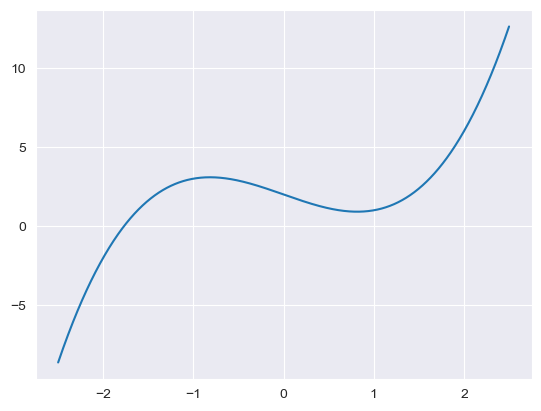

In [5]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x,f(x));

In [6]:
good_bool = np.abs(f(results)) < 0.001   #check the absolute value of the y-values from Newton's method

The length makes sense, because we have 1000 points.

In [7]:
good_bool.shape

(1000,)

Out of the 1000 input points, we see that 327 of them lead to a good estimate for a zero of $f$.

In [8]:
good_bool.sum()

327

Let's plot these points and see where they live. There's a mistake here, we need the size of `pts` to match the size of the $y$-values. There's a pretty easy fix for this.

ValueError: x and y must have same first dimension, but have shapes (327,) and (1,)

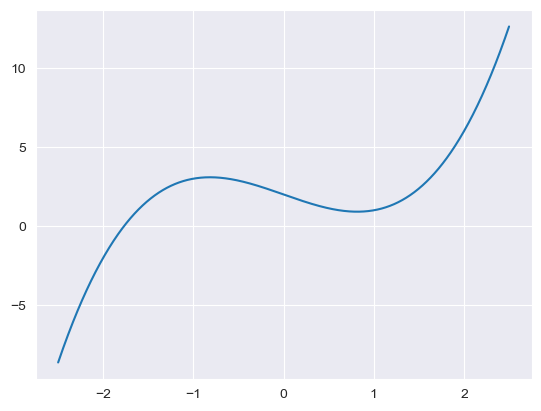

In [9]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
ax.plot(x,f(x));
ax.plot(pts,0,'ko')


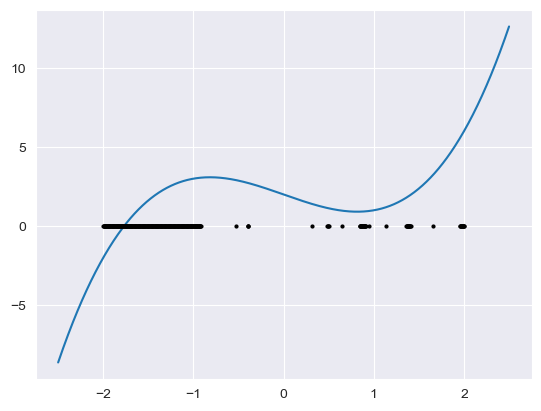

In [10]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
ax.plot(x,f(x));
ax.plot(pts,np.zeros(len(pts)),'ko',markersize=2);

Let's update this plot to now have the bad points in red.

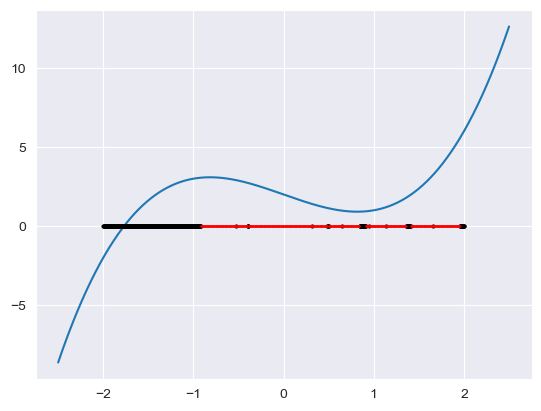

In [11]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
pts2 = z[~good_bool]
ax.plot(x,f(x));
ax.plot(pts,np.zeros(len(pts)),'ko',markersize=2);
ax.plot(pts2,np.zeros(len(pts2)),'ro',markersize=0.5); #smaller markers so the scattered black markers still show

***

## Image Processing

This unit will require you to import Pillow/PIL. It should already be installed through Anaconda, so all we need are the first import lines below

Why are we going through image processing? The point is not that image processing is super import to Math 9/numerical analysis, but that it gives us a really good opportunity to work with and visualize NumPy arrays.

### Opening an image

In [12]:
import os #operating system, used for accessing files on the computer.

In [13]:
from PIL import Image

I'm first going to show you how to open an image that's in the folder we're currently working in. When you open Jupyter notebook, the image should show up in the Home Page. If it's not there, you won't be able to open it.

In [14]:
Image.open("ash-lake.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

Maybe you're not sure which folder you're working in. Here's how we can check. I'm going to remove the output when I post these online, just because I don't want my file paths on the internet :)

In [15]:
os.getcwd() #current working directory

'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures'

This is how I can list everything in my current folder.

In [16]:
os.listdir()

['lec17_18_19_WI25.ipynb',
 'lec19_20_21_WI25.ipynb',
 'lec22_23_24_WI25.ipynb',
 'lec24_25_26_WI25.ipynb',
 'lec27_28_29_FA24.ipynb']

For organization, I almost always prefer to have a separate folder for images. I usually call it `images`.

In [17]:
os.listdir("images") #name of my folder

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

Say I wanted to open one of the images in my `images` folder. The following will cause an error, since the jpg is not in my current folder, but a subfolder.

In [18]:
Image.open('Red_room.jpeg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\Red_room.jpeg'

To navigate to the `images` folder, I could type out the path name directly, but this is going to be different for different operating systems. The way I'm going to show you is maybe cumbersome, but has the benefit of being able to work for any operating system.

In [19]:
s = os.path.join("images",'Red_room.jpeg')

In [20]:
s

'images\\Red_room.jpeg'

In [21]:
Image.open(s)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\images\\Red_room.jpeg'

How could I get all of the jpgs in a folder?

In [22]:
os.listdir("images")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

Less pythonic way:

In [23]:
[x for x in os.listdir("images") if x[-3:] == "jpg"]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

More pythonic way:

In [24]:
[x for x in os.listdir("images") if x.endswith("png")]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

In [25]:
[ x for x in os.listdir("images") if x.endswith("webp") ]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

In [26]:
for x in os.listdir("images"):
    if x.endswith("webp"):
        img = Image.open(os.path.join("images",x))
        display(img)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

### NumPy Arrays and Images

In [27]:
img = Image.open("ash-lake.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [28]:
img

NameError: name 'img' is not defined

In [29]:
type(img)

NameError: name 'img' is not defined

We can see this is not a NumPy array...here's what we do.

In [30]:
arr = np.asarray(img)

NameError: name 'img' is not defined

In [31]:
arr

array([[-2.        , -1.8       , -1.76994819, ..., -1.76929235,
        -1.76929235, -1.76929235],
       [-1.995996  , -1.79904502, -1.76990863, ..., -1.76929235,
        -1.76929235, -1.76929235],
       [-1.99199199, -1.7981021 , -1.76987075, ..., -1.76929235,
        -1.76929235, -1.76929235],
       ...,
       [ 1.99199199,  1.3942288 ,  0.89267945, ..., -1.77439792,
        -1.76931097, -1.76929235],
       [ 1.995996  ,  1.39711576,  0.89583318, ..., -1.78997896,
        -1.76959308, -1.76929242],
       [ 2.        ,  1.4       ,  0.89896907, ..., -1.82919995,
        -1.77171581, -1.76929656]])

In [32]:
type(arr)

numpy.ndarray

In [33]:
arr.shape

(1000, 8)

Think of this as saying we have $480 \times 480$ pixels, and each pixel has an RGB (Red-Green-Blue) triple.

Let's get the top-left-most pixel.

In [34]:
arr[0,0]

-2.0

This is saying we have 83 Red, 161 Green, 148 Blue.

Maybe I wonder what the range of these RGB values is.

In [35]:
arr.min()

-271.92477103312785

In [36]:
arr.max()

374.4567901234787

All together, there are $2^8 = 256$ possibilities for each RGB value. This is why we store these as 8-bit integers (notice the `dtype=uint8` in `arr`).

In [37]:
(arr[:,300:]).shape

(1000, 0)

Let's actually visualize this slice!

In [38]:
img

NameError: name 'img' is not defined

In [39]:
Image.fromarray(arr[:,300:])   #Sliced array gives cropped image

<PIL.Image.Image image mode=F size=0x1000>

In [40]:
Image.fromarray(arr[:,:100])   #note that the [0,0] pixel is in the upper left corner

<PIL.Image.Image image mode=F size=8x1000>

In [41]:
#Recall from last time
import numpy as np
from PIL import Image
import os
img = Image.open("ash-lake.png")
arr = np.asarray(img)
img

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [42]:
arr_no_mid = np.concatenate([arr[:,:100],arr[:,300:]], axis=1) #choose the axis where the array sizes are different.

In [43]:
Image.fromarray(arr_no_mid)  #middle of image cropped out

<PIL.Image.Image image mode=F size=8x1000>

In [44]:
arr_flip = arr[::-1,:,::]
Image.fromarray(arr_flip)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [45]:
arr_squash = arr[::2,:,::]
Image.fromarray(arr_squash)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [46]:
s = os.path.join("images",'Red_room.jpeg')
print(s)
Image.open(s)

images\Red_room.jpeg


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\images\\Red_room.jpeg'

In [47]:
arr_red = np.asarray(Image.open(s))
arr_red

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\images\\Red_room.jpeg'

In [48]:
arr_r_crop = arr_red[400:880,200:680]
Image.fromarray(arr_r_crop)

NameError: name 'arr_red' is not defined

In [49]:
#combine the two images by adding. Each color in each pixel is added together
Image.fromarray(arr + arr_r_crop)

NameError: name 'arr_r_crop' is not defined

In [50]:
#Better to weight how these picture are blended. Make sure values are integers, PIL is somewhat picky.
weight=0.4
Image.fromarray(np.uint8((1-weight)*arr + weight*arr_r_crop))

NameError: name 'arr_r_crop' is not defined

### Setting Colors 

__Goal:__ Change a horizontal band of the image to a single color.

In [51]:
img = Image.open("ash-lake.png")
arr = np.asarray(img)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

Let's start by getting a horizontal band.

In [52]:
Image.fromarray(arr[200:300])

<PIL.Image.Image image mode=F size=8x100>

This is going to throw an error!

In [53]:
arr[200:300] = 0

Main point: `img` and `arr` are _references_ to the image. What this means for us is that we can look, but we can't change anything. To get around this, we work on a copy!

In [54]:
B = arr.copy()

In [55]:
import sys

The size of `img` is SO small! This is because it's a reference.

In [56]:
sys.getsizeof(img)

NameError: name 'img' is not defined

This is still pretty small! 

In [57]:
sys.getsizeof(arr)

64128

In [58]:
sys.getsizeof(B)

64128

In [59]:
a = np.zeros((1000,1000))   #to compare how sizing works

In [60]:
b = a

In [61]:
sys.getsizeof(a)

8000128

In [62]:
sys.getsizeof(b)

8000128

In [63]:
B[200:300] = 0

In [64]:
Image.fromarray(B)

<PIL.Image.Image image mode=F size=8x1000>

In [65]:
B[200:300] = 255

In [66]:
Image.fromarray(B)

<PIL.Image.Image image mode=F size=8x1000>

Remember, this was the top-left-most color from earlier:

In [67]:
colors = np.array([83, 161, 148])

In [68]:
B[200:300].shape

(100, 8)

In [69]:
colors.shape

(3,)

In [70]:
B[200:300] = colors

ValueError: could not broadcast input array from shape (3,) into shape (100,8)

In [71]:
Image.fromarray(B)

<PIL.Image.Image image mode=F size=8x1000>

Just for fun! From color picker:

In [72]:
B[200:300] = np.array([119, 152, 181])

ValueError: could not broadcast input array from shape (3,) into shape (100,8)

In [73]:
Image.fromarray(B)

<PIL.Image.Image image mode=F size=8x1000>

### Making an image from scratch

In [74]:
arr = np.array([[[255,0,0],[0,255,0]],[[0,0,255],[255,255,0]]])

I'll start by making an error :)

In [75]:
Image.fromarray(arr)

TypeError: Cannot handle this data type: (1, 1, 3), <i4

The issue here is that I haven't specified a data type. What should it be?

In [76]:
arr = np.array([[[255,0,0],[0,255,0]],[[0,0,255],[255,255,0]]],dtype=np.uint8)

You might think there's another error when we run this...

In [77]:
img = Image.fromarray(arr)

In [78]:
img

No error, it's just 2 pixels by 2 pixels...super small and hard to see.

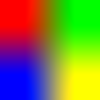

In [79]:
img.resize((100,100))

Maybe I don't like how it has extended the pixels (the blurring).

In [80]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(size: 'tuple[int, int]', resample: 'int | None' = None, box: 'tuple[float, float, float, float] | None' = None, reducing_gap: 'float | None' = None) -> 'Image' method of PIL.Image.Image instance
    Returns a resized copy of this image.

    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`Resampling.NEAREST`, :py:data:`Resampling.BOX`,
       :py:data:`Resampling.BILINEAR`, :py:data:`Resampling.HAMMING`,
       :py:data:`Resampling.BICUBIC` or :py:data:`Resampling.LANCZOS`.
       If the image has mode "1" or "P", it is always set to
       :py:data:`Resampling.NEAREST`. If the image mode specifies a number
       of bits, such as "I;16", then the default filter is
       :py:data:`Resampling.NEAREST`. Otherwise, the default filter is
       :py:data:`Resampling.BICUBIC`. See: :ref:`concept-filters`.
    :param box:

In [81]:
dir(Image.Resampling)

['BICUBIC',
 'BILINEAR',
 'BOX',
 'HAMMING',
 'LANCZOS',
 'NEAREST',
 '__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__members__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__qualname__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub

In [82]:
for s in dir(Image.Resampling):
    if s[0] != '_' and s[0].isupper():
        print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST


There is an issue in how we join `s` to the end.

In [83]:
for s in dir(Image.Resampling):
    if s[0] != '_' and s[0].isupper():
        print(s)
        display(img.resize((100,100),resample=Image.Resampling.s))

BICUBIC


AttributeError: type object 'Resampling' has no attribute 's'

__Fix 1:__

BICUBIC


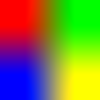

BILINEAR


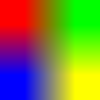

BOX


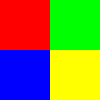

HAMMING


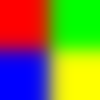

LANCZOS


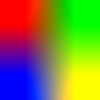

NEAREST


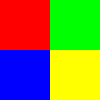

In [84]:
for s in dir(Image.Resampling):
    if s[0] != '_' and s[0].isupper():
        print(s)
        display(img.resize((100,100),resample=getattr(Image.Resampling,s)))

__Fix 2:__ This method is less flexible (I wouldn't usually expect it to work), but it does the job in this case.

BICUBIC


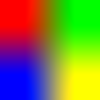

BILINEAR


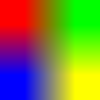

BOX


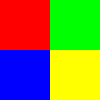

HAMMING


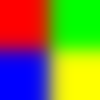

LANCZOS


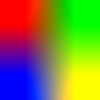

NEAREST


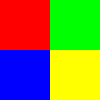

In [85]:
for s in dir(Image.Resampling):
    if s[0] != '_' and s[0].isupper():
        print(s)
        display(img.resize((100,100),resample=Image.Resampling[s]))

### Swapping color channels

__Goal:__ Want to swap the Red and Blue color channels.

In [86]:
import numpy as np
from PIL import Image
import os
img = Image.open("ash-lake.png")
arr = np.asarray(img)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [87]:
arr

array([[[255,   0,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [255, 255,   0]]], dtype=uint8)

This might be trickier than you'd expect. I'll start by making a common mistake.

In [88]:
mylist = [ 83, 161, 148]
mylist[0] = mylist[2]  #mylist[0] original value is overwritten
mylist[2] = mylist[0]  #mylist[0] already equals mylist[2], so no change occurs.
mylist

[148, 161, 148]

Common way:

In [89]:
mylist = [ 83, 161, 148]
temp = mylist[0]
mylist[0] = mylist[2]
mylist[2] = temp
mylist

[148, 161, 83]

We want to use this idea and apply it to all of `arr`. Again, there will be mistakes here.

In [90]:
B = arr.copy()
temp = B[:,:,0] #Red values; pointing to B - if B changes, so does temp
B[:,:,0] = B[:,:,2]
B[:,:,2] = temp

In [91]:
B[0,0]

array([0, 0, 0], dtype=uint8)

In [92]:
temp2 = B[:,:,0].copy()

In [93]:
sys.getsizeof(temp)

128

In [94]:
sys.getsizeof(temp2)

132

Here's how we can do it using the fact that `arr` is read-only

In [95]:
import numpy as np
from PIL import Image
import os
img = Image.open("ash-lake.png")
arr = np.asarray(img)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [96]:
#Swaps the Red and Blue Channels
B_rb = arr.copy()
B_rb[:,:,0] = arr[:,:,2]
B_rb[:,:,2] = arr[:,:,0]

In [97]:
B_rb[0,0]

array([  0,   0, 255], dtype=uint8)

In [98]:
img

In [99]:
Image.fromarray(B_rb)

Caption from chat: This could be from Dune

In [100]:
#Swaps the Red and Green Channels
B_rg = arr.copy()
B_rg[:,:,0] = arr[:,:,1]
B_rg[:,:,1] = arr[:,:,0]
Image.fromarray(B_rg)

In [101]:
#Swaps the Green and Blue Channels
B_gb = arr.copy()
B_gb[:,:,1] = arr[:,:,2]
B_gb[:,:,2] = arr[:,:,1]
Image.fromarray(B_gb)

## Invert Colors

Each color channel is flipped from high to low and vice versa. If $C_{new}$ is the new particular color, and $C_{old}$ is the original, we want

$C_{new} = 255 - C_{old}$

This is very easy to broadcast across the entire array.

In [102]:
import numpy as np
from PIL import Image
import os
img = Image.open("ash-lake.png")
arr = np.asarray(img)

B_rb = arr.copy()
B_rb[:,:,0] = arr[:,:,2]
B_rb[:,:,2] = arr[:,:,0]

B_rg = arr.copy()
B_rg[:,:,0] = arr[:,:,1]
B_rg[:,:,1] = arr[:,:,0]

img

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [103]:
#invert colors, each RGB value is flipped opposite
B_inv = arr.copy()
B_inv = 255-B_inv  
Image.fromarray(B_inv)

In [104]:
#invert colors on the Red-Blue swap
B_rb_inv = B_rb.copy()
B_rb_inv = 255-B_rb_inv  
Image.fromarray(B_rb_inv)

In [105]:
#invert colors on the Red-Green swap
B_rg_inv = B_rg.copy()
B_rg_inv = 255-B_rg_inv  
Image.fromarray(B_rg_inv)

## Threshold filter

Across all 3 color channels, we set a Threshold value. Per pixel, any color channel with value above the threshold is set to a max of 255. Any color channel below this threshold is set to 0.

In [106]:
#Threshold filter
B = arr.copy()
B_th = np.empty_like(B)

thresh = 125  #color channels over this value will be increased to the max value. Otherwise, they are 0.

#interesting values for this picture: 50, 70, 125, 150

for i in range(3): #loop over each color channel
    B_th[:, :, i] = (B[:, :, i] > thresh) * 255

Image.fromarray(B_th)

## Brighten/Darken Image

In [107]:
import numpy as np
from PIL import Image
import os
img = Image.open("ash-lake.png")
arr = np.asarray(img)

img

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Luke\\GitHub\\Math9-WI25\\lectures\\ash-lake.png'

In [108]:
B = arr.copy()

c = 0.7  #Darken, use constant between 0 and 1
B = np.uint8(c*B)  #pixels must be 8-bit integers.
Image.fromarray(B)

In [109]:
B = arr.copy()

c = 1.5 #Brighten, use constant greater than 1. 
#But too high constant causes some color channels to go above 255.
#c = 5 is gives weird and abstract rainbow colorings
#negative numbers also give weird colorings.
B = np.uint8(c*B)
Image.fromarray(B)

An 8-bit integer has a maximum value of 255 (8 digits of binary). An overflow rolls over back to 0. You can think of this as doing operations mod 256. High multiples magnify the difference between colors, which is why the colors start to scatter.

To fix these issues, we have to replace any color channel above 255 with exactly 255, before we convert to `np.uint8` type. Boolean indexing comes in handy here.

In [110]:
B = np.float64(arr.copy())

c = 3

B = c*B
B  #now we can see what the values are before they roll over.

array([[[765.,   0.,   0.],
        [  0., 765.,   0.]],

       [[  0.,   0., 765.],
        [765., 765.,   0.]]])

In [111]:
B > 255 #find the values that overflow

array([[[ True, False, False],
        [False,  True, False]],

       [[False, False,  True],
        [ True,  True, False]]])

In [112]:
255*(B>255) #True counts as 1, False counts as 0, so we multiply by 255

array([[[255,   0,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [255, 255,   0]]])

In [113]:
Image.fromarray(np.uint8(255*(B > 255)))   #visualize all of the color channels that overflow, for fun. 

In [114]:
B[B > 255] = 255
Image.fromarray(np.uint8(B)) #The final result

In [115]:
#All in one cell
L = np.float64(arr.copy())
c = 3
L = c*L
L[L > 255] = 255
Image.fromarray(np.uint8(L)) #The final result
#Note: There are smarter brightness algorithms than this.

## Grayscale Filter

Gray colors occur when Red = Green = Blue for a particular pixel. But there are easier ways to generate grayscale pictures.

Tensors of shape $(r, c, 3)$ give color pictures. Matrices of shape $(r,c)$ give grayscale images.

In [116]:
gray_range = np.arange(0,256).reshape(16,16)

In [117]:
img_gr = Image.fromarray(np.uint8(gray_range))
img_gr

Let's make a grayscale image of Ash lake, just from its red channel. Compare this to the green and blue channels, too.

In [118]:
B = arr[:,:,0].copy()    #red channel
#B = arr[:,:,1].copy()    #green channel
#B = arr[:,:,2].copy()    #blue channel
B = np.uint8(B)
Image.fromarray(B)

### A better algorithm for grayscale
For each pixel $(i,j)$ of color image $Y$, you can use the formula $$Y_{ij} = 0.2125\times Red_{ij} + 0.7154\times Green_{ij} + 0.0721\times Blue_{ij}$$ This specific combination of colors is used often in image processing, and can be found on the <a href="https://en.wikipedia.org/wiki/Grayscale"> Wikipedia page for Grayscale</a>

In [119]:
Y = arr.copy()
Y_bettergray = np.uint8(0.2125*Y[:,:,0] + 0.7154*Y[:,:,1] + 0.0721*Y[:,:,2])
Image.fromarray(Y_bettergray)

In [120]:
Y_bettergray.shape

(2, 2)

## Sepia Filter

This is similar to the Grayscale filter, but each new color channel gets a different combination of the original color channels. The constants used here are apparently recommended by Microsoft.

In [121]:
S = arr.copy()
S_sepia = np.zeros_like(S)
S_sepia[:,:,0] = 0.393*S[:,:,0] + 0.769*S[:,:,1] + 0.189*S[:,:,2]
S_sepia[:,:,1] = 0.349*S[:,:,0] + 0.686*S[:,:,1] + 0.168*S[:,:,2]
S_sepia[:,:,2] = 0.272*S[:,:,0] + 0.534*S[:,:,1] + 0.131*S[:,:,2]

Image.fromarray(np.uint8(S_sepia))

In [122]:
S_sepia.shape

(2, 2, 3)

We still need to stop any color channels from overflowing beyond 255

In [123]:
S_sepia = np.float64(np.zeros_like(S))
S_sepia[:,:,0] = 0.393*S[:,:,0] + 0.769*S[:,:,1] + 0.189*S[:,:,2]
S_sepia[:,:,1] = 0.349*S[:,:,0] + 0.686*S[:,:,1] + 0.168*S[:,:,2]
S_sepia[:,:,2] = 0.272*S[:,:,0] + 0.534*S[:,:,1] + 0.131*S[:,:,2]

S_sepia[S_sepia > 255] = 255
Image.fromarray(np.uint8(S_sepia))

## White Noise, Colorful Noise

In [124]:
rng = np.random.default_rng()
R = rng.integers(0,255,[100,700])

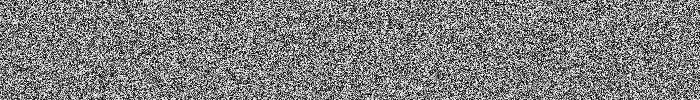

In [125]:
Image.fromarray(np.uint8(R))

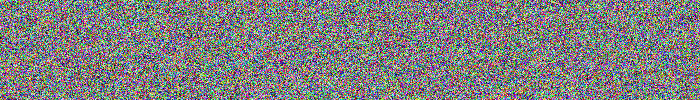

In [126]:
R_color = rng.integers(0,255,[100,700,3])
Image.fromarray(np.uint8(R_color))

In [127]:
R2 = rng.integers(0,255,arr.shape)  #get the size of the random array from the image array
weight = 0.3
Image.fromarray(np.uint8((1-weight)*(B_rb_inv) + weight*(R2)))  #Weight the two images together, like in the example earlier in this notebook.

## More photo manipulation effects

Many photo manipulation and image generation effects can be readily broadcast across the array of an image, pixel-by-pixel. Some of the above techniques are used directly by Photoshop.

More techniques rely on the pixels surrounding the individual pixel, such as blurring an image, sharpening an image, or edge detection. <a href = https://github.com/smithla-math/UCI_MATH_10/blob/master/homework/Homework4/homework_4.ipynb> Hints for these ideas can be found in Math 10 (an old Summer 2022 homework assignment) </a>.